Dataset: Network Intrusion Detection Dataset
Link: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection

For the given network intrusion dataset perform using python or java

a. Data preprocessing

b. Feature Selection

c. Dataset Partition

d. Model Fitting and Evaluation

    i. Naive Baye Classifier Model

    ii. Decision Tree Classifier Model

    iii. K Neighbours Classifier Model
    
    iv. Logistic Regression Model


### Importing Libraries and Dataset

In [189]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
df_train = pd.read_csv('Train_data.csv');
df_test = pd.read_csv('Test_data.csv');

In [191]:
df_train.shape

(25192, 42)

In [192]:
df_test.shape

(22544, 41)

In [193]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [194]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [195]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [197]:
df_train['class'].value_counts(sort=True, ascending=False)

class
normal     13449
anomaly    11743
Name: count, dtype: int64

C:\Users\Devansh Gupta\AppData\Local\Temp\ipykernel_20732\1906361774.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df_train["class"], palette=("Pastel2"))
C:\Users\Devansh Gupta\AppData\Local\Temp\ipykernel_20732\1906361774.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['normal', 'anomaly'])


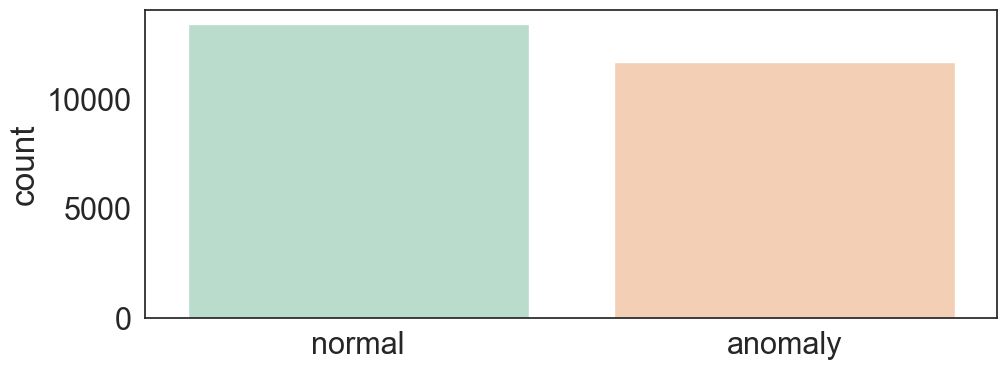

In [198]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x=df_train["class"], palette=("Pastel2"))
abs_values = df_train["class"].value_counts(ascending=False).values
ax.set_xticklabels(['normal', 'anomaly'])

plt.xlabel(None)
plt.show()

## Data Preprocessing

In [199]:
print(df_train['num_outbound_cmds'].value_counts())
print(df_test['num_outbound_cmds'].value_counts())

num_outbound_cmds
0    25192
Name: count, dtype: int64
num_outbound_cmds
0    22544
Name: count, dtype: int64


In [200]:
#'num_outbound_cmds' is a redundant column so remove it from both train & test datasets
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [201]:
df_train.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
srv_rerror_rate                False
s

In [202]:
df_test.isna().any()

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
srv_rerror_rate                False
s

In [203]:
df_train.shape

(25192, 41)

In [204]:
df_test.shape

(22544, 40)

In [205]:
df_train.duplicated().sum()

0

In [206]:
df_test.duplicated().sum()

57

### Label Encoding for categorical data

In [207]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets 
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['class'], axis=1)
cat_Ytrain = traincat[['class']].copy()

### Scaling Numerical Attributes or Feature Scaling

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = df_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [209]:
X_train = pd.concat([sc_traindf,enctrain],axis=1)
y_train = cat_Ytrain
X_train.shape

(25192, 40)

In [210]:
X_train.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281,1,19,9
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,2,41,9
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281,1,46,5
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768,1,22,9
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281,1,22,9


In [211]:
y_train.head()

,class
0,1
1,1
2,0
3,1
4,1


In [212]:
X_test = pd.concat([sc_testdf,testcat],axis=1)
X_test.shape

(22544, 40)

## Feature Selection using Random Forest Classifier

c:\Users\Devansh Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                        feature  importance
0                      duration       0.003
1                     src_bytes       0.181
2                     dst_bytes       0.130
3                          land       0.000
4                wrong_fragment       0.004
5                        urgent       0.000
6                           hot       0.011
7             num_failed_logins       0.000
8                     logged_in       0.035
9               num_compromised       0.006
10                   root_shell       0.000
11                 su_attempted       0.000
12                     num_root       0.000
13           num_file_creations       0.000
14                   num_shells       0.000
15             num_access_files       0.000
16                is_host_login       0.000
17               is_guest_login       0.001
18                        count       0.036
19                    srv_count       0.016
20                  serror_rate       0.007
21              srv_serror_rate 

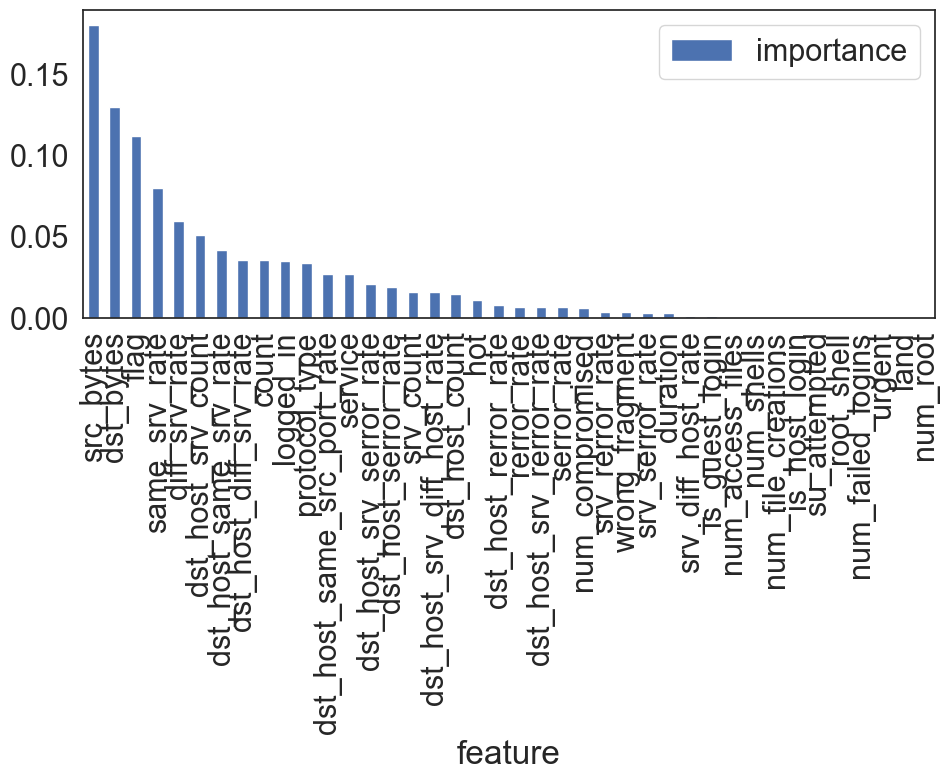

In [213]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(X_train, y_train);
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
new_importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
new_importances.plot.bar()


print(importances)

In [214]:
importances = importances.sort_values(by='importance', ascending=False)

# Get the top 15 features
top_15_features = importances.head(15)['feature'].tolist()

# Print the top 15 features
print(top_15_features)


['src_bytes', 'dst_bytes', 'flag', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'count', 'logged_in', 'protocol_type', 'dst_host_same_src_port_rate', 'service', 'dst_host_srv_serror_rate', 'dst_host_serror_rate']


## Dataset Partition

In [215]:
df_train.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'count',
       'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [216]:
print(y_train)
print(X_train)

       class
0          1
1          1
2          0
3          1
4          1
...      ...
25187      0
25188      0
25189      0
25190      0
25191      0

[25192 rows x 1 columns]
       duration  src_bytes  dst_bytes     land  wrong_fragment    urgent  \
0     -0.113551  -0.009889  -0.039310 -0.00891       -0.091223 -0.006301   
1     -0.113551  -0.010032  -0.039310 -0.00891       -0.091223 -0.006301   
2     -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
3     -0.113551  -0.009996   0.052473 -0.00891       -0.091223 -0.006301   
4     -0.113551  -0.010010  -0.034582 -0.00891       -0.091223 -0.006301   
...         ...        ...        ...      ...             ...       ...   
25187 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25188 -0.113551  -0.009954  -0.039310 -0.00891       -0.091223 -0.006301   
25189 -0.113551  -0.010093  -0.039310 -0.00891       -0.091223 -0.006301   
25190 -0.113551  -0.010093  -0.039310 -0.00891       -0.09

In [217]:
X_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.138370,-0.431856,-0.229980,-0.358118,-0.35275,1.979791,1.929116,1,45,1
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.228985,1.559906,0.004234,-0.358118,-0.35275,-0.602719,-0.565483,1,19,9
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.410217,2.833328,3.049016,-0.358118,-0.35275,-0.602719,-0.565483,0,13,9
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,0.360018,-0.333901,0.004234,-0.358118,-0.35275,1.540764,1.205682,1,55,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,-0.155534,-0.020309,-0.081202,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,-0.138370,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,49,9
22540,-0.155534,-0.021318,-0.052690,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,1.123125,-0.016494,...,-0.410217,-0.399204,-0.112873,-0.321505,-0.35275,-0.602719,-0.565483,1,22,9
22541,-0.155534,0.093373,0.294926,-0.017624,-0.059104,-0.019459,2.040705,-0.143999,1.123125,0.121069,...,-0.410217,-0.431856,-0.229980,-0.358118,-0.35275,-0.421943,-0.390861,1,22,9
22542,-0.155534,-0.021899,-0.094917,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,-0.364909,-0.431856,-0.229980,-0.358118,-0.35275,-0.602719,-0.565483,2,11,9


In [218]:
#creating validation data
from sklearn.model_selection import train_test_split

X_train,X_val,Y_train,Y_val = train_test_split(X_train,y_train,train_size=0.70, random_state=2)

## Model Fitting

In [219]:
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
knn= KNeighborsClassifier(n_neighbors=5,weights='uniform',n_jobs=-1)
knn.fit(X_train, Y_train); 

# Train LogisticRegression Model
classifier = LogisticRegression(n_jobs=-1, random_state=12345)
classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
bayes = BernoulliNB()
bayes.fit(X_train, Y_train)
            
# Train Decision Tree Model
treeclassifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=12345,splitter='best',max_depth=None, min_samples_split=2)
treeclassifier.fit(X_train, Y_train)

c:\Users\Devansh Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Devansh Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\Devansh Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


DecisionTreeClassifier(criterion='entropy', random_state=12345)

## Evaluate Models

In [221]:
X_train.shape

(17634, 40)

In [222]:
Y_train.shape

(17634, 1)

In [226]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the true labels for the test data
y_true = Y_train 

# Evaluate each model
models = [(bayes,'BernoulliNB'), (knn,'KNeighborsClassifier'), (classifier,'LogisticRegression'), (treeclassifier,'RandomForestClassifier')]

for model, model_name in models:
    # Make predictions using the model
    y_pred = model.predict(X_train)  # Replace X_test with the actual test data
    
    # Print the model name
    print(f"Model: {model_name}")
    
    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    # Print the accuracy score
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}\n")


Model: BernoulliNB
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      8245
           1       0.88      0.96      0.92      9389

    accuracy                           0.91     17634
   macro avg       0.91      0.90      0.91     17634
weighted avg       0.91      0.91      0.91     17634

Confusion Matrix:
[[7000 1245]
 [ 392 8997]]
Accuracy: 0.9071679709651809

Model: KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8245
           1       0.99      1.00      0.99      9389

    accuracy                           0.99     17634
   macro avg       0.99      0.99      0.99     17634
weighted avg       0.99      0.99      0.99     17634

Confusion Matrix:
[[8168   77]
 [  33 9356]]
Accuracy: 0.9937620505840989

Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support


## Validating Models

In [227]:
y_true = Y_val

for model, model_name in models:
    # Make predictions using the model
    y_pred = model.predict(X_val)  # Replace X_test with the actual test data
    
    # Print the model name
    print(f"Model: {model_name}")
    
    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    
    # Print the accuracy score
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy: {accuracy}\n")


Model: BernoulliNB
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      3498
           1       0.88      0.95      0.92      4060

    accuracy                           0.91      7558
   macro avg       0.91      0.90      0.91      7558
weighted avg       0.91      0.91      0.91      7558

Confusion Matrix:
[[2981  517]
 [ 188 3872]]
Accuracy: 0.906721354855782

Model: KNeighborsClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3498
           1       0.99      0.99      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558

Confusion Matrix:
[[3458   40]
 [  23 4037]]
Accuracy: 0.9916644614977508

Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support



## Predicting Test Result

In [228]:
pred_knn = knn.predict(X_test)
pred_NB = bayes.predict(X_test)
pred_log = classifier.predict(X_test)
pred_dt = treeclassifier.predict(X_test)

In [229]:
print("{},{},{},{}".format(pred_knn,pred_NB,pred_log,pred_dt))

[0 0 1 ... 0 1 0],[0 0 1 ... 1 1 0],[0 0 1 ... 1 1 0],[0 0 1 ... 0 1 0]
